In [2]:
"""
An explanation of notation throughout
#: Description of what the cell is doing
##: Relevant comments from the analyst on results of the output or changes
Triple ": Larger asides to discuss overall plan or strategy before engaging in various steps
"""

'\nAn explanation of notation throughout\n#: Description of what the cell is doing\n##: Relevant comments from the analyst on results of the output or changes\nTriple ": Larger asides to discuss overall plan or strategy before engaging in various steps\n'

In [4]:
#Install relevant & commonly used packages
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install missingno
!pip install scipy
!pip install seaborn

In [5]:
#Import relevant & commonly used packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import scipy.stats as stats
import seaborn as sns
from sklearn.decomposition import PCA

In [8]:
#Import raw data file
raw_df = pd.read_csv('churn_raw_data.csv')

In [10]:
#Creating a copy of the data frame to preserve the initial data file in its own variable
df = raw_df.copy()

In [12]:
"""
Cells 7 through 11 were used to provide early profiling of the data, as well as reference for at a glance on the structure, shape, and quick
visual analysis to understand it more before implementing more specific techniques, and served as a baseline to compare as analysis progressed
"""
#Viewing initial dataset values
df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [14]:
#Initial profiling set of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [16]:
#Initial description of the dataset
pd.set_option('display.max_columns', None)
df.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [18]:
#Initial dimensions of the dataset
df.shape

(10000, 52)

In [20]:
#Looking a full row of observations in the dataframe to review as examples for analysis and export for an example for each set in the analysis
templist = df.iloc[1] #[In-text Citation: Srivastava, Alankrit. 2024]
templist.to_clipboard(index=False)
print(templist)

Unnamed: 0                                                 2
CaseOrder                                                  2
Customer_id                                          S120509
Interaction             fb76459f-c047-4a9d-8af9-e0f7d4ac2524
City                                             West Branch
State                                                     MI
County                                                Ogemaw
Zip                                                    48661
Lat                                                 44.32893
Lng                                                 -84.2408
Population                                             10446
Area                                                   Urban
Timezone                                     America/Detroit
Job                                   Programmer, multimedia
Children                                                 1.0
Age                                                     27.0
Education               

In [22]:
##Before moving into deeper analysis, I will confirm certain assumptions about the dataset and clean up column headers for ease of review

#Confirming 'Unnamed: 0' and 'CaseOrder' are true duplicates
matching = df['Unnamed: 0'] == df['CaseOrder']
print(matching)

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Length: 10000, dtype: bool


In [24]:
#Counting values that match within 'Unnamed: 0' and 'CaseOrder'
print(matching.value_counts())
print("\nUnique Values:")
print(matching.unique())
##As all values are True, 'Unnamed: 0' is duplicate column

True    10000
Name: count, dtype: int64

Unique Values:
[ True]


In [26]:
#Renaming items 1 - 8 to give the survey results more relevant columns titles
df.rename(columns = {
    'item1' : 'Timely_Response',
    'item2' : 'Timely_Fix',
    'item3' : 'Timely_Replacement',
    'item4' : 'Reliability',
    'item5' : 'Options',
    'item6' : 'Respectfulness',
    'item7' : 'Courtesy',
    'item8' : 'Active_Listening'},
    inplace=True)
##This makes these columns easier to review without repeatedly referencing a data dictionary

In [28]:
#List of all column headers & confirming header changes
print(list(df.columns))

['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fix', 'Timely_Replacement', 'Reliability', 'Options', 'Respectfulness', 'Courtesy', 'Active_Listening']


In [30]:
#Create a variable to list all headers for future steps
df_cols = df.columns
print(df_cols)

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fix',
       'Timely_Replacement', 'Reliability', 'Options', 'Respectfulness',
       'Courtesy', 'Active_Listening'],
      dtype='object')


In [32]:
'''
Cells 17 through 20 complete steps to check for duplicates in the dataset
'''
#Identifying duplicates in the initial dataset
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [34]:
#Completing full comparison of values
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [36]:
##I want to confirm the data transaction/customer ID isn't preventing duplicates from being found
#Temporarily removing the first 4 variables in the dataset (Unnamed: 0, CaseOrder, Customer_ID, Interaction) and checking for duplicates again
df_temp = df.iloc[:, 3:] #[In-text Citation: Srivastava, Alankrit. 2024]

In [38]:
#Identifying duplicates in the truncated dataset
print(df_temp.duplicated().value_counts())
##No duplicate rows detected in this dataset

False    10000
Name: count, dtype: int64


In [40]:
'''
Starting review of outliers
Cells 21 through 28 are for reviewing outlier data within the dataset
'''
#Identifying the quantitative variables
quantitative_variables = df.select_dtypes(include=['float64', 'int64'])#[In-text Citation: Selecting Specific Data Types. 2024]
quantitative_variables



,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fix,Timely_Replacement,Reliability,Options,Respectfulness,Courtesy,Active_Listening
0,1,1,99927,56.25100,-133.37571,38,NaN,68.0,28561.99,6.972566,10,0,1,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,48661,44.32893,-84.24080,10446,1.0,27.0,21704.77,12.014541,12,0,1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,97148,45.35589,-123.24657,3735,4.0,50.0,NaN,10.245616,9,0,1,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,92014,32.96687,-117.24798,13863,1.0,48.0,18925.23,15.206193,15,2,0,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,77461,29.38012,-95.80673,11352,0.0,83.0,40074.19,8.960316,16,2,1,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,5758,43.43391,-72.78734,640,3.0,NaN,55723.74,9.265392,12,2,0,68.197130,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,9997,37042,36.56907,-87.41694,77168,4.0,48.0,NaN,8.115849,15,2,0,61.040370,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,9998,79061,35.52039,-100.44180,406,NaN,NaN,NaN,4.837696,10,0,0,NaN,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,9999,9999,30117,33.58016,-85.13241,35575,1.0,39.0,16667.58,12.076460,14,1,0,71.095600,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [42]:
##Many of these variables are not valid for analysis as they are indexes, survey respones, address related or lat/long which are from a separate database

#Narrowing the relevant variables to analyze for outliers
quantitative_variables = quantitative_variables.drop(columns=['Unnamed: 0', 'CaseOrder', 'Zip', 'Lat', 
                                                              'Lng', 'Timely_Response', 'Timely_Fix', 'Timely_Replacement', 'Reliability', 'Options', 'Respectfulness',
                                                              'Courtesy', 'Active_Listening'])
quantitative_variables #Ensuring only variables to analyze remain

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,NaN,68.0,28561.99,6.972566,10,0,1,6.795513,171.449762,904.536110
1,10446,1.0,27.0,21704.77,12.014541,12,0,1,1.156681,242.948015,800.982766
2,3735,4.0,50.0,NaN,10.245616,9,0,1,15.754144,159.440398,2054.706961
3,13863,1.0,48.0,18925.23,15.206193,15,2,0,17.087227,120.249493,2164.579412
4,11352,0.0,83.0,40074.19,8.960316,16,2,1,1.670972,150.761216,271.493436
...,...,...,...,...,...,...,...,...,...,...,...
9995,640,3.0,NaN,55723.74,9.265392,12,2,0,68.197130,159.828800,6511.253000
9996,77168,4.0,48.0,NaN,8.115849,15,2,0,61.040370,208.856400,5695.952000
9997,406,NaN,NaN,NaN,4.837696,10,0,0,NaN,168.220900,4159.306000
9998,35575,1.0,39.0,16667.58,12.076460,14,1,0,71.095600,252.628600,6468.457000


In [44]:
#Showing set of variables to provide outlier analysis on
print(quantitative_variables.columns.tolist())

['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']


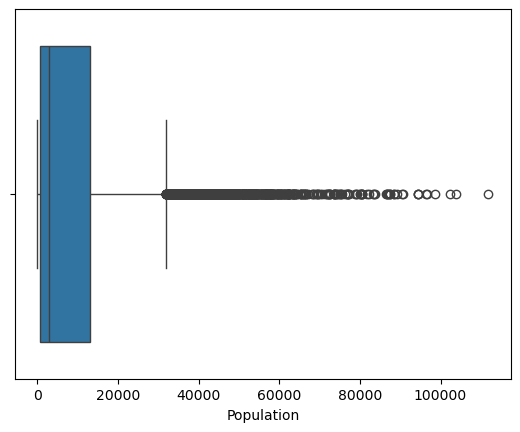

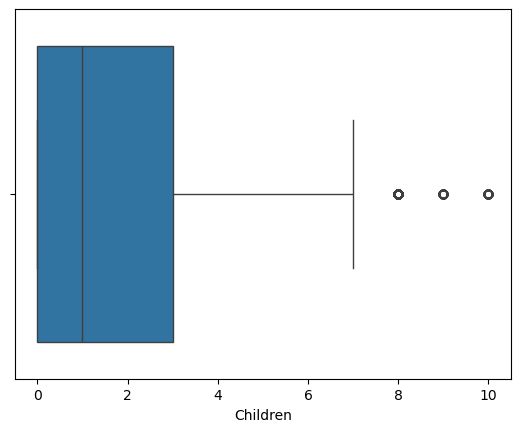

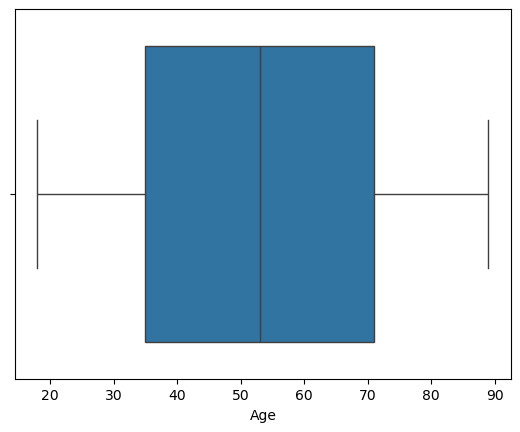

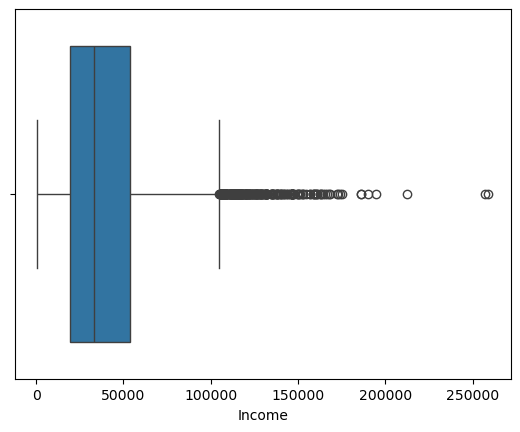

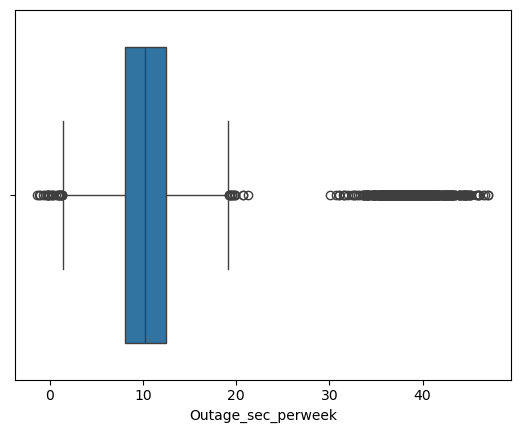

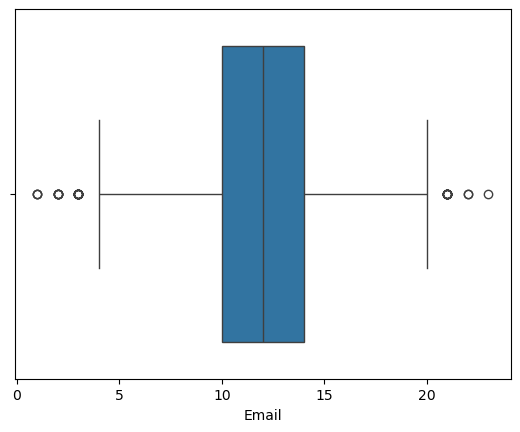

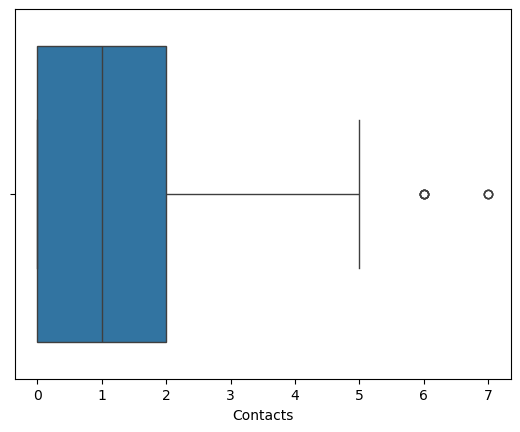

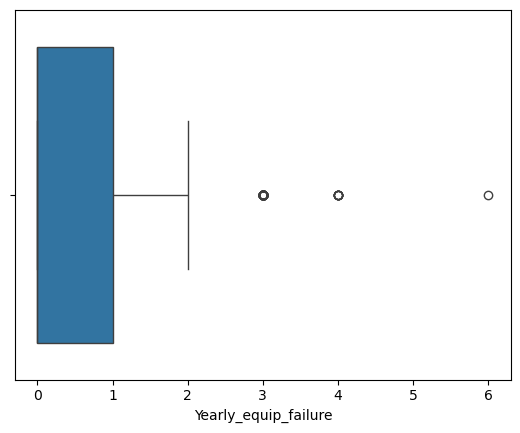

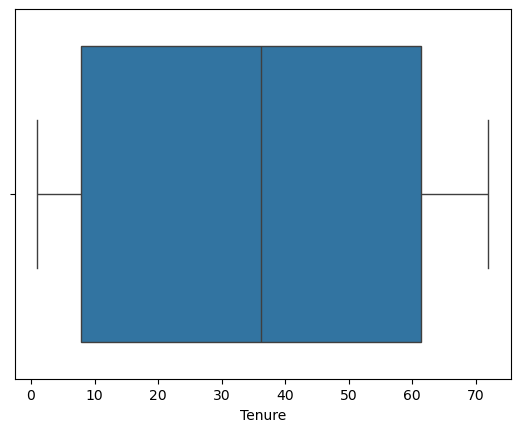

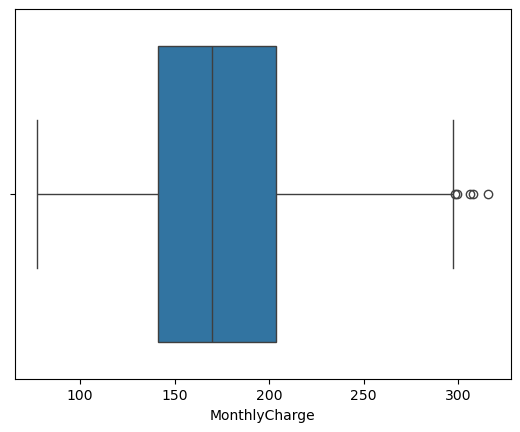

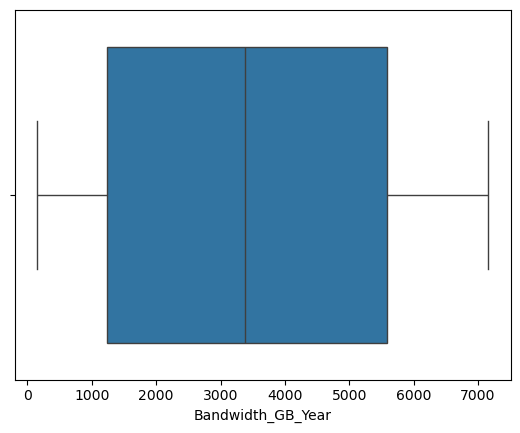

In [46]:
#Plotting all of the relevant variables identified above
boxplot = sns.boxplot(x='Population', data=df)
plt.show()
boxplot = sns.boxplot(x='Children', data=df)
plt.show()
boxplot = sns.boxplot(x='Age', data=df)
plt.show()
boxplot = sns.boxplot(x='Income', data=df)
plt.show()
boxplot = sns.boxplot(x='Outage_sec_perweek', data=df)
plt.show()
boxplot = sns.boxplot(x='Email', data=df)
plt.show()
boxplot = sns.boxplot(x='Contacts', data=df)
plt.show()
boxplot = sns.boxplot(x='Yearly_equip_failure', data=df)
plt.show()
boxplot = sns.boxplot(x='Tenure', data=df)
plt.show()
boxplot = sns.boxplot(x='MonthlyCharge', data=df)
plt.show()
boxplot = sns.boxplot(x='Bandwidth_GB_Year', data=df)
plt.show()

In [48]:
#Describing all affected variables to identify if changes need to be made
print(df[['Population', 'Children', 'Age']].describe())
print(df[['Income', 'Outage_sec_perweek', 'Email']].describe())
print(df[['Contacts', 'Yearly_equip_failure', 'Tenure']].describe())
print(df[['MonthlyCharge', 'Bandwidth_GB_Year']].describe())

          Population     Children          Age
count   10000.000000  7505.000000  7525.000000
mean     9756.562400     2.095936    53.275748
std     14432.698671     2.154758    20.753928
min         0.000000     0.000000    18.000000
25%       738.000000     0.000000    35.000000
50%      2910.500000     1.000000    53.000000
75%     13168.000000     3.000000    71.000000
max    111850.000000    10.000000    89.000000
              Income  Outage_sec_perweek         Email
count    7510.000000        10000.000000  10000.000000
mean    39936.762226           11.452955     12.016000
std     28358.469482            7.025921      3.025898
min       740.660000           -1.348571      1.000000
25%     19285.522500            8.054362     10.000000
50%     33186.785000           10.202896     12.000000
75%     53472.395000           12.487644     14.000000
max    258900.700000           47.049280     23.000000
           Contacts  Yearly_equip_failure       Tenure
count  10000.000000        

In [50]:
#Taking a closer look at Outage_sec_perweek which had negative values, which is not possible
outage_test = df["Outage_sec_perweek"][df["Outage_sec_perweek"] < 0]
print(outage_test)
## 11 Values that are negative

1904   -1.195428
1997   -0.339214
3069   -0.206145
3629   -0.152845
4167   -1.348571
4184   -0.352431
4427   -1.099934
6093   -0.787115
6463   -0.144644
6577   -0.527396
8194   -0.214328
Name: Outage_sec_perweek, dtype: float64


In [52]:
#Imputing median for the negative values
df["Outage_sec_perweek"] = np.where(df["Outage_sec_perweek"] < 0, np.nan, df["Outage_sec_perweek"])
df["Outage_sec_perweek"] = df["Outage_sec_perweek"].fillna(df["Outage_sec_perweek"].median())

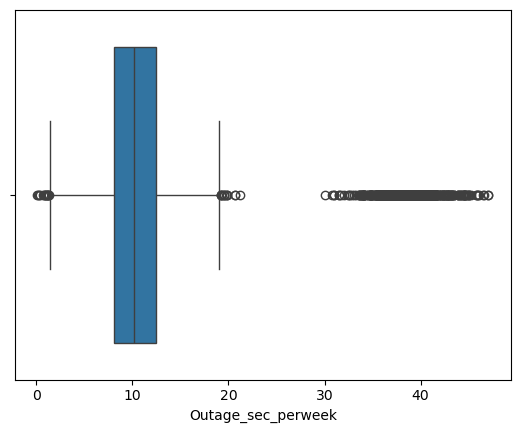

In [54]:
#Validating change worked
boxplot = sns.boxplot(x='Outage_sec_perweek', data=df)
plt.show()
##Plot demonstrates no negative values

In [56]:
'''
Starting review of missing values
'''

#Showing missing values in the dataset in a list format
df.isnull().sum()
##Children, Age, Income, Techie, InternetService, Phone, TechSupport, Tenure and Bandwidth_GB_Year all returned some null values

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

Text(0.5, 1.0, 'Fields with Missing Data')

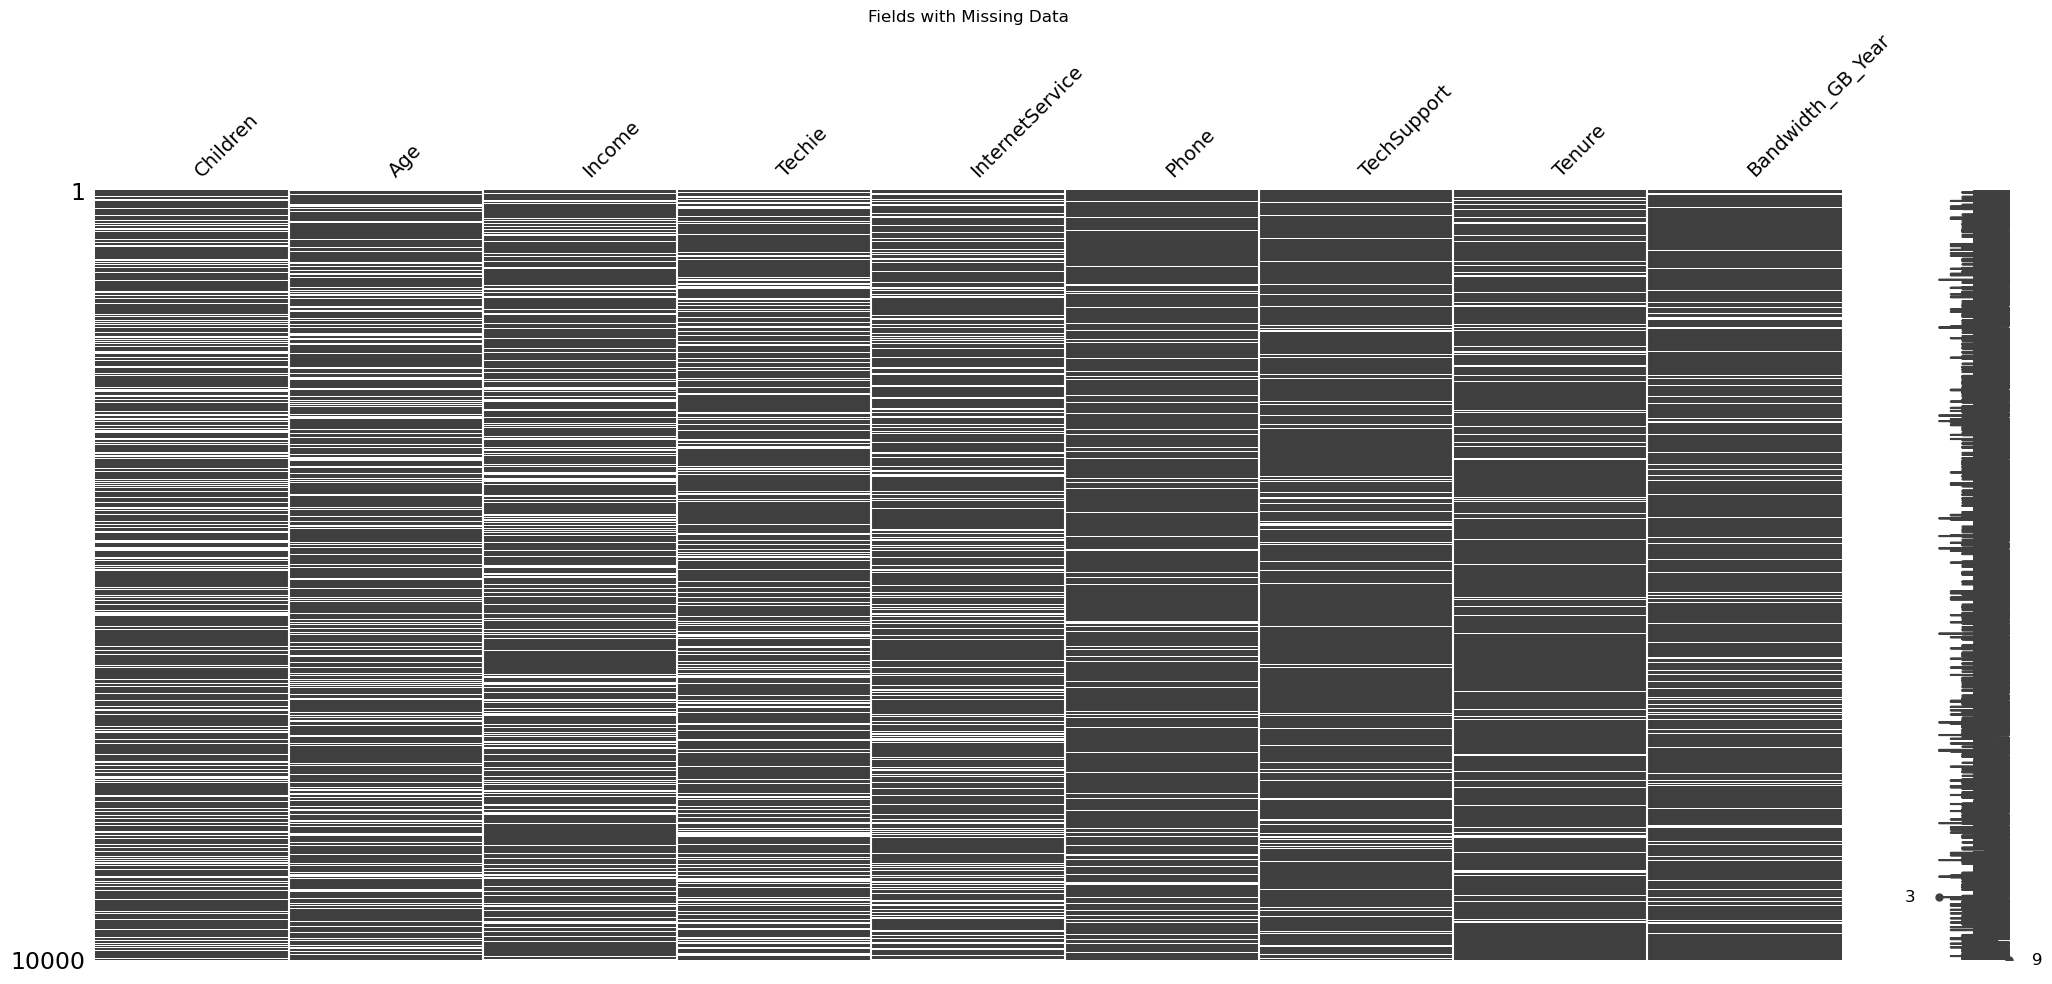

In [58]:
#Creating a matrix with only the values that were missing
df_columns_missing = df[df.columns[df.isnull().any()]]
msno.matrix(df_columns_missing, fontsize = 14)
plt.title("Fields with Missing Data")

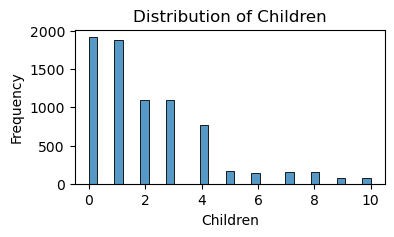

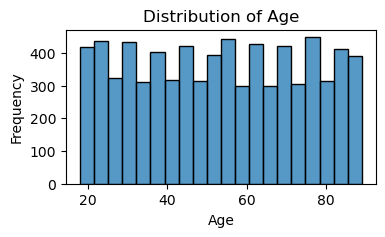

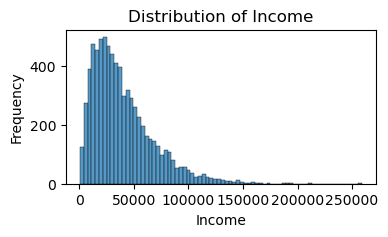

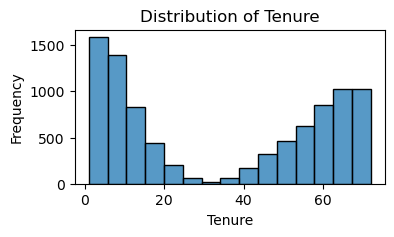

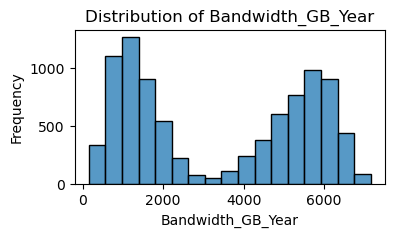

In [60]:
"""
Cells 31 through 42 impute the appropriate central tendencies into the quantitative variables with missing values
Will first review the overall distributions to ensure the imputation does not change our analysis too much
Then impute, and finally check the distributions again afterwards to ensure the imputation did not significnatly alter the data
For any variables where mode will be imputed, some extra rigor will be required to ensure the appropriate mode is input for multiple modes or NaN values
"""
#Using Seaborn to identify the distribution of the quantitative variables
missing_variables = ["Children", "Age", "Income", "Tenure", "Bandwidth_GB_Year"]
for var in missing_variables:
    plt.figure(figsize=(4, 2))
    sns.histplot(data=df, x=var, kde=False)
    plt.title(f'Distribution of {var}') #[In-text Citation: Fstrings. 2024]
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [62]:
#Calculating mean, median or mode variables before imputation as an alternative verification method
imputation_columns = df[['Children', 'Age', 'Income', 'Tenure', 'Bandwidth_GB_Year']]

print("MEAN")
print(imputation_columns.mean())
print("\nMEDIAN")
print(imputation_columns.median())
print("\nMODE")
print(imputation_columns.mode())


MEAN
Children                 2.095936
Age                     53.275748
Income               39936.762226
Tenure                  34.498858
Bandwidth_GB_Year     3398.842752
dtype: float64

MEDIAN
Children                 1.00000
Age                     53.00000
Income               33186.78500
Tenure                  36.19603
Bandwidth_GB_Year     3382.42400
dtype: float64

MODE
   Children   Age    Income    Tenure  Bandwidth_GB_Year
0       0.0  55.0  10530.09  55.44991           5228.370
1       NaN   NaN  25598.66  62.86571           5626.094
2       NaN   NaN  36461.20  66.66853           5932.680
3       NaN   NaN  61325.92  69.50480           6081.603
4       NaN   NaN       NaN       NaN           6261.419
5       NaN   NaN       NaN       NaN           6294.845
6       NaN   NaN       NaN       NaN           6417.345


In [64]:
#Age has a uniform distribution. Using Mean to impute
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [66]:
#Rounding values of Age to ensure all values remain whole numbers
df["Age"] = df["Age"].round()

In [68]:
#Children has a positively skewed distribution. Using Median to impute
df["Children"] = df["Children"].fillna(df["Children"].median())

In [70]:
#Income has a positvely skewed distribution. Using Median to impute
df["Income"] = df["Income"].fillna(df["Income"].median())

In [72]:
#Tenure has an aysymmetric bimodal disribution. Using first Mode to impute
mode_tenure = df["Tenure"].mode()
mode_to_impute = mode_tenure[0] #Referencing first value in Mode
df["Tenure"] = df["Tenure"].fillna(mode_to_impute)

In [74]:
#Checking if the missing values in Bandwidth_GB_Year were for customers with no internet
testdf = df[['Bandwidth_GB_Year', 'InternetService']]
testdf2 = testdf[testdf['Bandwidth_GB_Year'].isnull()]
print(testdf2)
##Multiple values with NaN have InternetService. Will impute using Mode

      Bandwidth_GB_Year InternetService
14                  NaN             DSL
33                  NaN             DSL
40                  NaN     Fiber Optic
45                  NaN             NaN
58                  NaN             NaN
...                 ...             ...
9896                NaN     Fiber Optic
9914                NaN     Fiber Optic
9939                NaN             NaN
9986                NaN     Fiber Optic
9988                NaN     Fiber Optic

[1021 rows x 2 columns]


In [76]:
#Bandwidth_GB_Year has an aysmmetric bimodal disribution. Using Mode to impute
mode_bandwidth = df["Bandwidth_GB_Year"].mode()
mode_to_impute = mode_bandwidth[0]
df["Bandwidth_GB_Year"] = df["Bandwidth_GB_Year"].fillna(mode_to_impute)

In [78]:
#Validating missing value changes and ensuring no null values remain
imputation_columns = df[['Children', 'Age', 'Income', 'Tenure', 'Bandwidth_GB_Year']]
imputation_columns.isnull().sum()
## All 5 variables no longer demonstrating missing values

Children             0
Age                  0
Income               0
Tenure               0
Bandwidth_GB_Year    0
dtype: int64

In [80]:
#Confirming imputation did not significanlty affect the mean, median and mode values
imputation_columns = df[['Children', 'Age', 'Income', 'Tenure', 'Bandwidth_GB_Year']]

print("MEAN")
print(imputation_columns.mean())
print("\nMEDIAN")
print(imputation_columns.median())
print("\nMODE")
print(imputation_columns.mode())

##Changes to overall variables within acceptable range

MEAN
Children                 1.822500
Age                     53.207500
Income               38256.017897
Tenure                  36.449401
Bandwidth_GB_Year     3585.637484
dtype: float64

MEDIAN
Children                 1.0000
Age                     53.0000
Income               33186.7850
Tenure                  47.4448
Bandwidth_GB_Year     4472.3030
dtype: float64

MODE
   Children   Age     Income    Tenure  Bandwidth_GB_Year
0       1.0  53.0  33186.785  55.44991            5228.37


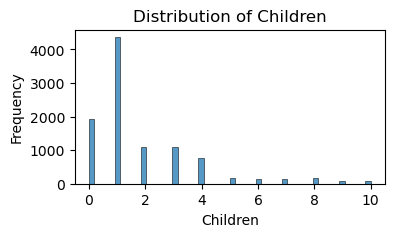

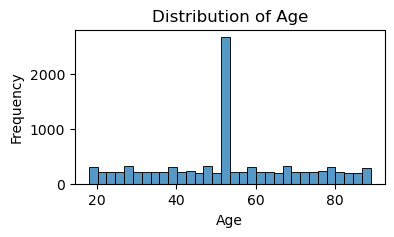

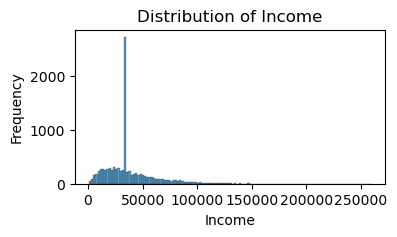

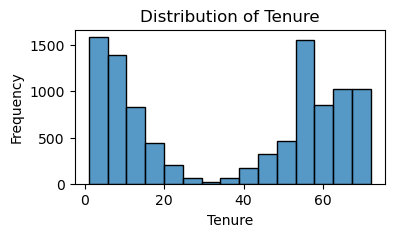

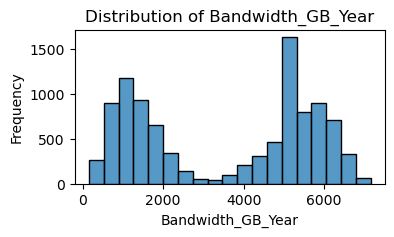

In [82]:
#Confirming the distributions did not change after imputation
missing_variables = ["Children", "Age", "Income", "Tenure", "Bandwidth_GB_Year"]
for var in missing_variables:
    plt.figure(figsize=(4, 2))
    sns.histplot(data=df, x=var, kde=False)
    plt.title(f'Distribution of {var}') #[In-text Citation: Fstrings. 2024]
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

##The below demonstrates the distribution generally remained the same, with spikes where imputation occured as expected

In [43]:
"""
For the qualitative variables Techie, Phone and TechSupport, imputation is not appropriate. There are only two options to impute (yes or no),
and imputing one or the other would greatly change the distribution and quality of the data. As such I made the determination to make no changes to those variables.
"""

'\nFor the qualitative variables Techie, Phone and TechSupport, imputation is not appropriate. There are only two options to impute (yes or no),\nand imputing one or the other would greatly change the distribution and quality of the data. As such I made the determination to make no changes to those variables.\n'

In [84]:
#Validating each categorical variable with missing values to ensure there are no spelling errors, unexpected responses, or values which require re-expression of variables and checking missing percentage
df["Techie"].value_counts()
## Approximately 25% of records are missing values

Techie
No     6266
Yes    1257
Name: count, dtype: int64

In [86]:
df["Phone"].value_counts()
## Approximately 10% of records are missing values

Phone
Yes    8128
No      846
Name: count, dtype: int64

In [88]:
df["TechSupport"].value_counts()
## Approximately 10% of records are missing values

TechSupport
No     5635
Yes    3374
Name: count, dtype: int64

In [90]:
##Missing values here are valid, as the third option per the data dictionary should be "None" - the values may be None (without quotes) so pandas is interpreting this as NaN
df["InternetService"].value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [92]:
#Replacing None with "None"
df["InternetService"] = df["InternetService"].replace([None], "None")

In [94]:
#Confirming the imputation worked
df["InternetService"].value_counts()
##Values no longer missing

InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

In [96]:
""" Beginning Re-Expression of Variables"""
#Reviewing responses to confirm any obvious re-expression of variables required
for col in df.columns:
    print(f"Value counts for column '{col}':")#[In-text Citation: Fstrings. 2024]
    print(df[col].value_counts())
    print()
##Education is the only qualitative nominal variable that has a clear rank or order

Value counts for column 'Unnamed: 0':
Unnamed: 0
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

Value counts for column 'CaseOrder':
CaseOrder
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

Value counts for column 'Customer_id':
Customer_id
K409198    1
X300173    1
M155745    1
G126132    1
O148559    1
          ..
F454437    1
W845098    1
P854487    1
K983374    1
T38070     1
Name: count, Length: 10000, dtype: int64

Value counts for column 'Interaction':
Interaction
aa90260b-4141-4a24-8e36-b04ce1f4f77b    1
26769b47-8eda-4e14-9baf-7348b64b7da3    1
6d65ca83-1001-4d01-a3f9-c3ae5ac33a83    1
448944cf-10f6-4a04-a8e0-4079b6791e26    1
a9890702-06c6-4337-9d5b-65f7d1e30466    1
                                       ..
c650b63b-2d68-48f2-911d-6e8c838c8185   

In [98]:
#Preparing to ordinally encode Education
df['Education'].unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [100]:
#Creating a new Education_Numeric column for numeric analysis & Replacing values with ordinal value
df["Education_Numeric"] = df["Education"]
dict_education = {"Education_Numeric":{
    'No Schooling Completed': 0,
    'Nursery School to 8th Grade': 1,
    '9th Grade to 12th Grade, No Diploma': 2,
    'GED or Alternative Credential': 3,
    'Regular High School Diploma': 4,
    'Professional School Degree': 5,
    'Some College, Less than 1 Year': 6,
    'Some College, 1 or More Years, No Degree': 7,
    "Associate's Degree": 8,
    "Bachelor's Degree": 9,
    "Master's Degree": 10,
    'Doctorate Degree': 11
}}
pd.set_option('future.no_silent_downcasting', True)
df.replace(dict_education, inplace=True)

In [102]:
#Confirming the replacement worked
df["Education_Numeric"].unique()

array([10, 4, 11, 0, 8, 9, 6, 3, 7, 2, 1, 5], dtype=object)

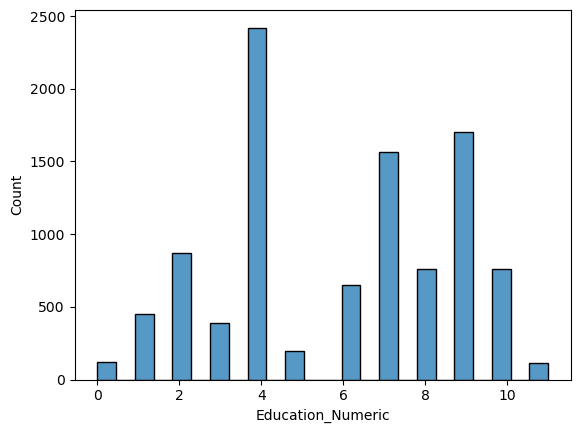

In [104]:
#Confirming the new variable was created and can be manipulated
boxplot = sns.histplot(x='Education_Numeric', data=df)
plt.show()

In [106]:
#Moving  columns with missing or irrelevant values to their own dataframe to maintain the records, but remove from relevant analysis
df_cols_removed = df[['Unnamed: 0', 'Techie', 'Phone', 'TechSupport']] ##The duplicated index, and qualitative variables which were not imputed
df_after_removal = df.drop(columns = df_cols_removed) ##Remaining clean variables

print(df_cols_removed.columns) #Demonstrating columns removed
print(df_after_removal.columns) #Demonstrating the removal worked

Index(['Unnamed: 0', 'Techie', 'Phone', 'TechSupport'], dtype='object')
Index(['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fix',
       'Timely_Replacement', 'Reliability', 'Options', 'Respectfulness',
       'Courtesy', 'Active_Listening', 'Education_Numeric'],
      dtype='object')


In [108]:
#Exporting the cleaned dataset to a CSV File
df_after_removal.to_csv('cleaned_churn_data.csv', index=False)
df_cols_removed.to_csv('cleaned_churn_data_cols_removed.csv', index=False)

In [110]:
"""
Starting PCA
"""
#Creating PCA Dataframe
churn_pca_df = df_after_removal[['Lat', 'Lng', 'Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]##Using only variables identified as Quantitative Continuous

In [112]:
#Normalizing the Data
churn_normalized = (churn_pca_df-churn_pca_df.mean())/churn_pca_df.std()

In [114]:
#Identifying the number of components
pca = PCA(n_components=churn_pca_df.shape[1])
pca.fit(churn_normalized)

PCA(n_components=7)

In [116]:
#Completing Normalization
churn_pca = pd.DataFrame(pca.transform(churn_normalized),
                         columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [118]:
#Generating Output of PCA Loadings
loadings = pd.DataFrame(pca.components_.T,
                columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'],
                        index=churn_pca_df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Lat,-0.021207,0.205989,0.672574,-0.016780,-0.709945,0.021313,-0.002295
Lng,0.004835,-0.132457,-0.690240,0.129016,-0.692559,0.098439,-0.005235
Income,0.003419,0.022593,0.097599,0.990066,0.073546,-0.065656,-0.001092
Outage_sec_perweek,0.022869,0.692372,-0.126679,0.035691,0.100437,0.701909,-0.003578
Tenure,0.705170,-0.053022,0.027246,0.000359,-0.011740,0.039501,0.705325
MonthlyCharge,0.044746,0.676236,-0.211380,-0.039252,-0.025662,-0.700716,0.053101
Bandwidth_GB_Year,0.706913,-0.005334,0.014725,-0.005202,-0.006830,-0.017473,-0.706859


In [120]:
#Calculating Covariance
cov_matrix = np.dot(churn_normalized.T, churn_normalized) / churn_pca_df.shape[0]

In [122]:
#Calculating Vectors
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

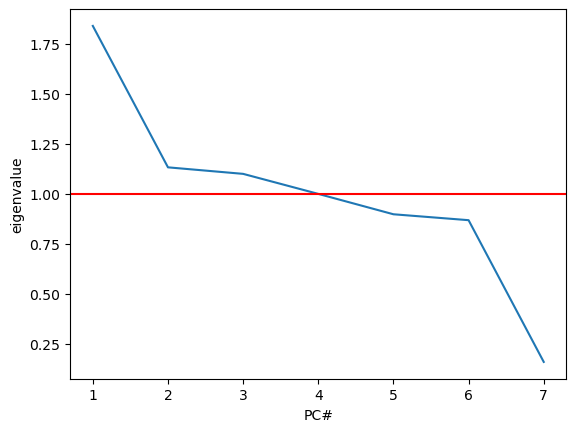

In [124]:
#Creating scree plot
x_values = range(1, len(eigenvalues) + 1) ## Adjusting the x-axis to start at 1
plt.plot(x_values, eigenvalues)
plt.xlabel('PC#')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color='Red')
plt.show()
## PC1, PC2, PC3 and PC4 should be considered